# **Results**

In [1]:
import matplotlib.pyplot as plt
import pickle
import cv2

### Load Classifiers

In [31]:
f = open("clf_digi.pk", "rb")
clf_digit = pickle.load(f)
f.close()

f = open("clf_math.pk", "rb")
clf_math = pickle.load(f)
f.close()

f = open("clf.pk", "rb")
clf = pickle.load(f)
f.close()

/home/mica/anaconda3/lib/python3.7/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator LabelBinarizer from version 0.21.3 when using version 0.22.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/home/mica/anaconda3/lib/python3.7/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator MLPClassifier from version 0.21.3 when using version 0.22.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


### Load Image

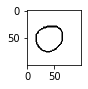

In [32]:
img = cv2.imread("img/0/test_img_0_0.png")
plt.figure(figsize=(1,1))
plt.imshow(img)
plt.show()

The classifiers accept a 28x28 greyscale img. We need to convert our images to a format that the classifiers accept. The images come with varying sizes and are encoded using RGB.

#### Grayscale/Thresholding

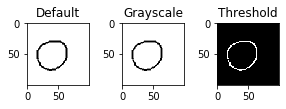

In [33]:
fig, axs = plt.subplots(1,3, figsize=(4, 4))
fig.tight_layout(pad=0.25)


axs[0].imshow(img)
axs[0].set_title("Default")

# Grayscale
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
axs[1].imshow(img_gray, cmap="Greys_r")
axs[1].set_title("Grayscale")

# Threshold
_, img_thresh = cv2.threshold(img_gray, 120, 255, cv2.THRESH_BINARY_INV)
axs[2].imshow(img_thresh, cmap="Greys_r")
axs[2].set_title("Threshold")

plt.show()

#### Resizing

Img shape before resizing: (100, 100)
Img shape after resizing: (28, 28)
Img shape after resizing: (45, 45)


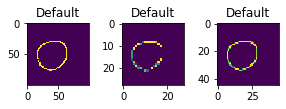

In [34]:
print("Img shape before resizing:", img_thresh.shape)
resized_img_28 = cv2.resize(img_thresh, (28, 28))
resized_img_45 = cv2.resize(img_thresh, (45, 45))
print("Img shape after resizing:", resized_img_28.shape)
print("Img shape after resizing:", resized_img_45.shape)

fig, axs = plt.subplots(1,3, figsize=(4, 4))
fig.tight_layout(pad=0.25)

axs[0].imshow(img_thresh)
axs[0].set_title("Default")

axs[1].imshow(resized_img_28)
axs[1].set_title("Default")

axs[2].imshow(resized_img_45)
axs[2].set_title("Default")

plt.show()

### Classification

In [35]:
lookup = {
    "0" : 0,
    "1" : 1,
    "2" : 2,   
    "3" : 3,
    "4" : 4,
    "5" : 5,
    "6" : 6,
    "7" : 7,
    "8" : 8,
    "9" : 9,
    "(" : 0,
    ")" : 1,
    "+" : 2,
    "-" : 3,
    "/" : 4,
}

In [38]:
symbol = lookup[clf_digit.predict([resized_img_28.ravel()])[0]]
print("Digit Classification:")
print("\tSymbol",symbol)
print("\tConfidence",clf_digit.predict_proba([resized_img_28.ravel()])[0][symbol])

symbol = clf_math.predict([resized_img_45.ravel()])[0]
print("Math Classification:")
print("\tSymbol",symbol)
print("\tConfidence",clf_math.predict_proba([resized_img_45.ravel()])[0][lookup[symbol]])

symbol = clf.predict([resized_img_28.ravel()])[0]
print("General Classification:")
print("\tSymbol",symbol)
print("\tConfidence",clf.predict_proba([resized_img_28.ravel()])[0][lookup[symbol]])

Digit Classification:
	Symbol 7
	Confidence 1.0
Math Classification:
	Symbol +
	Confidence 1.0
General Classification:
	Symbol 7
	Confidence 2.2384694106379426e-05
